### Dataset link: https://snap.stanford.edu/data/amazon0302.html


In [1]:
# import google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Importing the essential libraries for the project

In [2]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import re
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/content/drive/MyDrive/Graph Analytics Project')

## Data description

In [4]:
import pandas as pd

# URL of the Amazon co-purchasing dataset
url = 'https://snap.stanford.edu/data/amazon0302.html'

# Read the CSV into a Pandas DataFrame
df = pd.read_html(url)

# Display the first few rows of the DataFrame
df[0]

Dataset statistics Dataset statistics.1
0                              Nodes               262111
1                              Edges              1234877
2               Nodes in largest WCC       262111 (1.000)
3               Edges in largest WCC      1234877 (1.000)
4               Nodes in largest SCC       241761 (0.922)
5               Edges in largest SCC      1131217 (0.916)
6     Average clustering coefficient               0.4198
7                Number of triangles               717719
8       Fraction of closed triangles              0.09339
9   Diameter (longest shortest path)                   32
10  90-percentile effective diameter                   11

In [5]:
df[1]

File                                        Description
0  amazon0302.txt.gz  Amazon product co-purchaisng network from Marc...

## Data Preprocessing

In [6]:
import csv
import gzip

with gzip.open('amazon0302.txt.gz', 'rt') as f:
    reader = csv.reader(f, delimiter='\t')
    with open('amazon0302.csv', 'w') as fout:
        writer = csv.writer(fout)
        for row in reader:
            writer.writerow(row)

In [ ]:
# Read amazon0302.csv

df2 = pd.read_csv('amazon0302.csv', sep='\t', header=None)
df2.columns = ['nodes']
df2 = df2[4:]
df2 = df2.reset_index(drop=True)
df2

nodes
0                  0,1
1                  0,2
2                  0,3
3                  0,4
4                  0,5
...                ...
1234872  262110,262099
1234873  262110,262100
1234874  262110,262101
1234875  262110,262106
1234876  262110,262107

[1234877 rows x 1 columns]

In [ ]:
# Split nodes into two columns based on comma

df2['source'] = df2['nodes'].str.split(',').str[0]
df2['target'] = df2['nodes'].str.split(',').str[1]
df2 = df2[['source', 'target']]
df2

source  target
0             0       1
1             0       2
2             0       3
3             0       4
4             0       5
...         ...     ...
1234872  262110  262099
1234873  262110  262100
1234874  262110  262101
1234875  262110  262106
1234876  262110  262107

[1234877 rows x 2 columns]

In [ ]:
df3 = df2[:5000]
df3

source target
0         0      1
1         0      2
2         0      3
3         0      4
4         0      5
...     ...    ...
4995   1050    952
4996   1050   1069
4997   1050   1070
4998   1050   1071
4999   1051    302

[5000 rows x 2 columns]

## Export the data as csv

In [ ]:
# Export the data as csv

df3.to_csv('amazon_copurchase_5000.csv', index=False)


## Check whether the graph is directed

In [ ]:
# show whether the graph is directed
import networkx as nx

# Create a graph from the Pandas DataFrame
g = nx.from_pandas_edgelist(df3, source='source', target='target')
print("Check whether the Graph is directed:", nx.is_directed(g))


Check whether the Graph is directed: False


## Show the No. of Nodes and Edges in the graph

In [ ]:
G1 = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Print the edges and length of the nodes
print("\n\n The nodes of the label graph are:", G1.nodes())
print("\n\n The Number of Nodes in the Network:  ", len(G1.nodes()))

# Print the edges and length of edges
print("\n\n The edges of the label graph are:", G1.edges())
print("\n\n The Number of Edges in the Network are:", len(G1.edges()))



 The nodes of the label graph are: ['0', '1', '2', '3', '4', '5', '15', '11', '12', '13', '14', '63', '64', '65', '66', '67', '7', '16', '17', '18', '19', '6', '8', '9', '10', '20', '30', '290', '21', '22', '23', '24', '137', '138', '139', '25', '26', '260', '261', '262', '263', '264', '140', '141', '27', '28', '29', '68', '69', '70', '71', '72', '73', '75', '31', '32', '33', '34', '35', '36', '74', '77', '164', '37', '38', '39', '111', '142', '40', '41', '42', '43', '44', '45', '46', '47', '265', '266', '267', '268', '76', '78', '79', '80', '81', '82', '143', '144', '145', '146', '147', '48', '49', '50', '83', '84', '85', '51', '148', '149', '150', '56', '93', '94', '95', '151', '52', '53', '54', '55', '152', '153', '154', '155', '97', '269', '270', '271', '272', '273', '86', '87', '59', '88', '57', '58', '156', '157', '158', '89', '90', '274', '275', '276', '277', '278', '60', '61', '62', '159', '91', '92', '96', '160', '161', '162', '163', '98', '99', '279', '280', '100', '101', '

## Visualize 5000 nodes from the network

In [ ]:

Graph = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Visualize the graph
plt.figure(figsize=(12, 12))


pos = nx.random_layout(Graph, seed = 30)
nx.draw(Graph, with_labels = False,  pos = pos, node_size = 40, alpha = 0.3, edge_color = 'green', node_color = 'blue')


# Show the graph
plt.title("Amazon Copurchase network with 5000 Nodes", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Visualize the top 1000 Nodes with labels

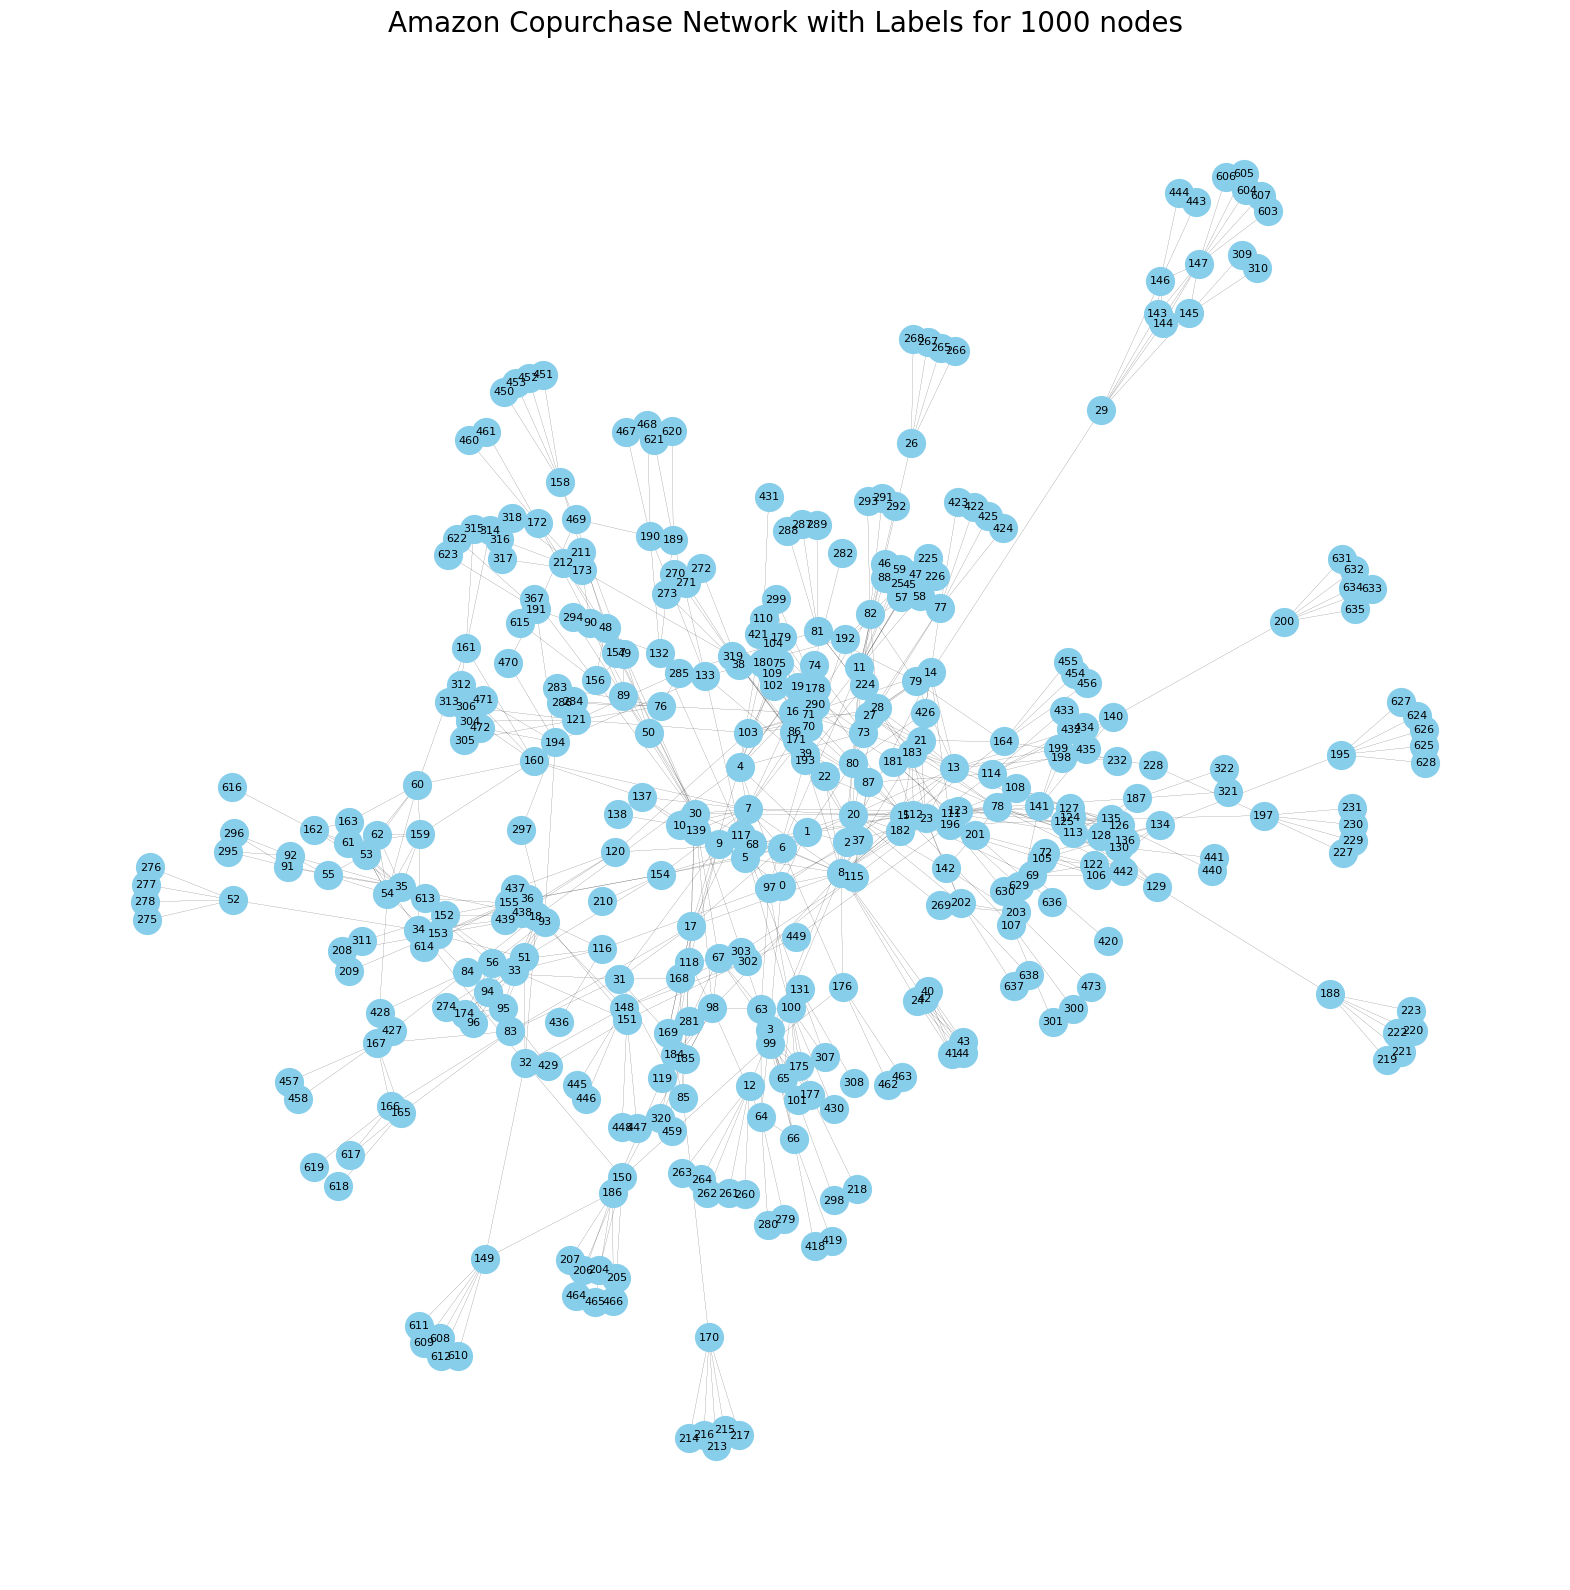

In [ ]:
# Visualize 5000 nodes with labels from the network

G = nx.from_pandas_edgelist(df3[:1000], 'source', 'target', create_using=nx.Graph)

# Visualize the graph
plt.figure(figsize=(20, 20))


pos = nx.spring_layout(G)  # Layout algorithm for node positions
nx.draw_networkx(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)

# Show the graph
plt.title("Amazon Copurchase Network with Labels for 1000 nodes", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


## Calculate the Radius of the network

The radius of a network is essentially the smallest maximum distance from any node to all other nodes within that network. It gives an idea of how 'central' or 'compact' a network is by measuring how far the most distant node is from the center.

For example, in a social network, the radius could represent the minimum number of connections needed to reach the farthest individual from any given person within the network.

In [ ]:
# Calculate the radius of the network

import networkx as nx

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)
print("The radius of the network is:", nx.radius(G))


The radius of the network is: 8


## Calculate the diameter of the network

The diameter of a network is a measure of the maximum distance between any pair of nodes in the graph. In simpler terms, it represents the longest shortest path between any two nodes within the network.

In [ ]:
# What is diameter of a network

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)


diameter = nx.diameter(G)

print("The diameter of the Amazon co-purchase network is:", diameter)


The diameter of the Amazon co-purchase network is: 15


## Calculate the density of the network


The density of a network is a measure that describes the proportion of edges that exist in a graph relative to the total number of possible edges. It quantifies how interconnected the nodes are within the network.

The value of density ranges from 0 to 1. A density of 0 indicates no edges exist in the graph, while a density of 1 means that the graph is fully connected (every node is connected to every other node).

In [ ]:
# Calculate the density of the amazon copurchasing network

density = nx.density(G)

# Print the density
print("The density of the Amazon co-purchase network is:", density)


The density of the Amazon co-purchase network is: 0.0025127768313458264


## Plot the degree distribution for the Amazon copurchase Network

The degree distribution of a network illustrates the frequency or probability distribution of nodes based on their degrees. In simpler terms, it shows how many nodes have a certain number of connections (degree) in the network.

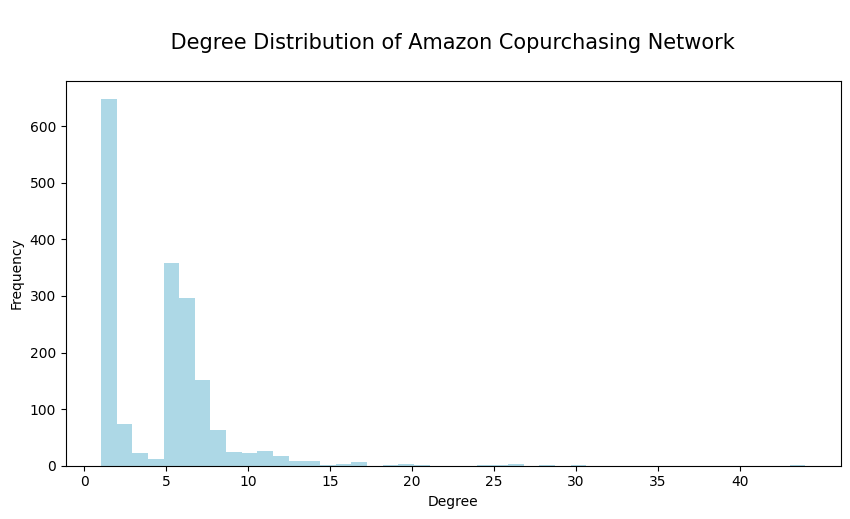

In [ ]:

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

degree_sequence = [d for n, d in G.degree()]
plt.figure(figsize=(10, 5))
degree_sequence.sort(reverse=True)
plt.hist(degree_sequence, bins=max(degree_sequence) + 1, color="lightblue")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, max(degree_sequence) + 1, step=5))

plt.title("\n Degree Distribution of Amazon Copurchasing Network \n", fontsize=15)
plt.show()

## Highest Degree

In [ ]:
G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

top_10_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]

print(top_10_nodes)

[('8', 44), ('18', 30), ('346', 28), ('33', 26), ('78', 26), ('481', 26), ('63', 25), ('99', 24), ('11', 21), ('30', 21)]


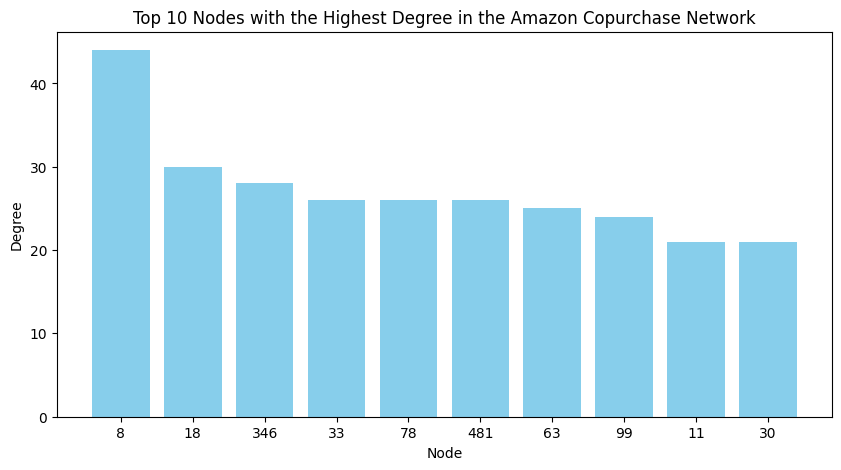

In [ ]:
# Visualize the top 10 nodes with the highest degree and draw a bar chart

top_10_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]

plt.figure(figsize=(10, 5))
plt.bar([i[0] for i in top_10_nodes], [i[1] for i in top_10_nodes], color = "skyblue")
plt.xlabel("Node")
plt.ylabel("Degree")
plt.title("Top 10 Nodes with the Highest Degree in the Amazon Copurchase Network")
plt.show()


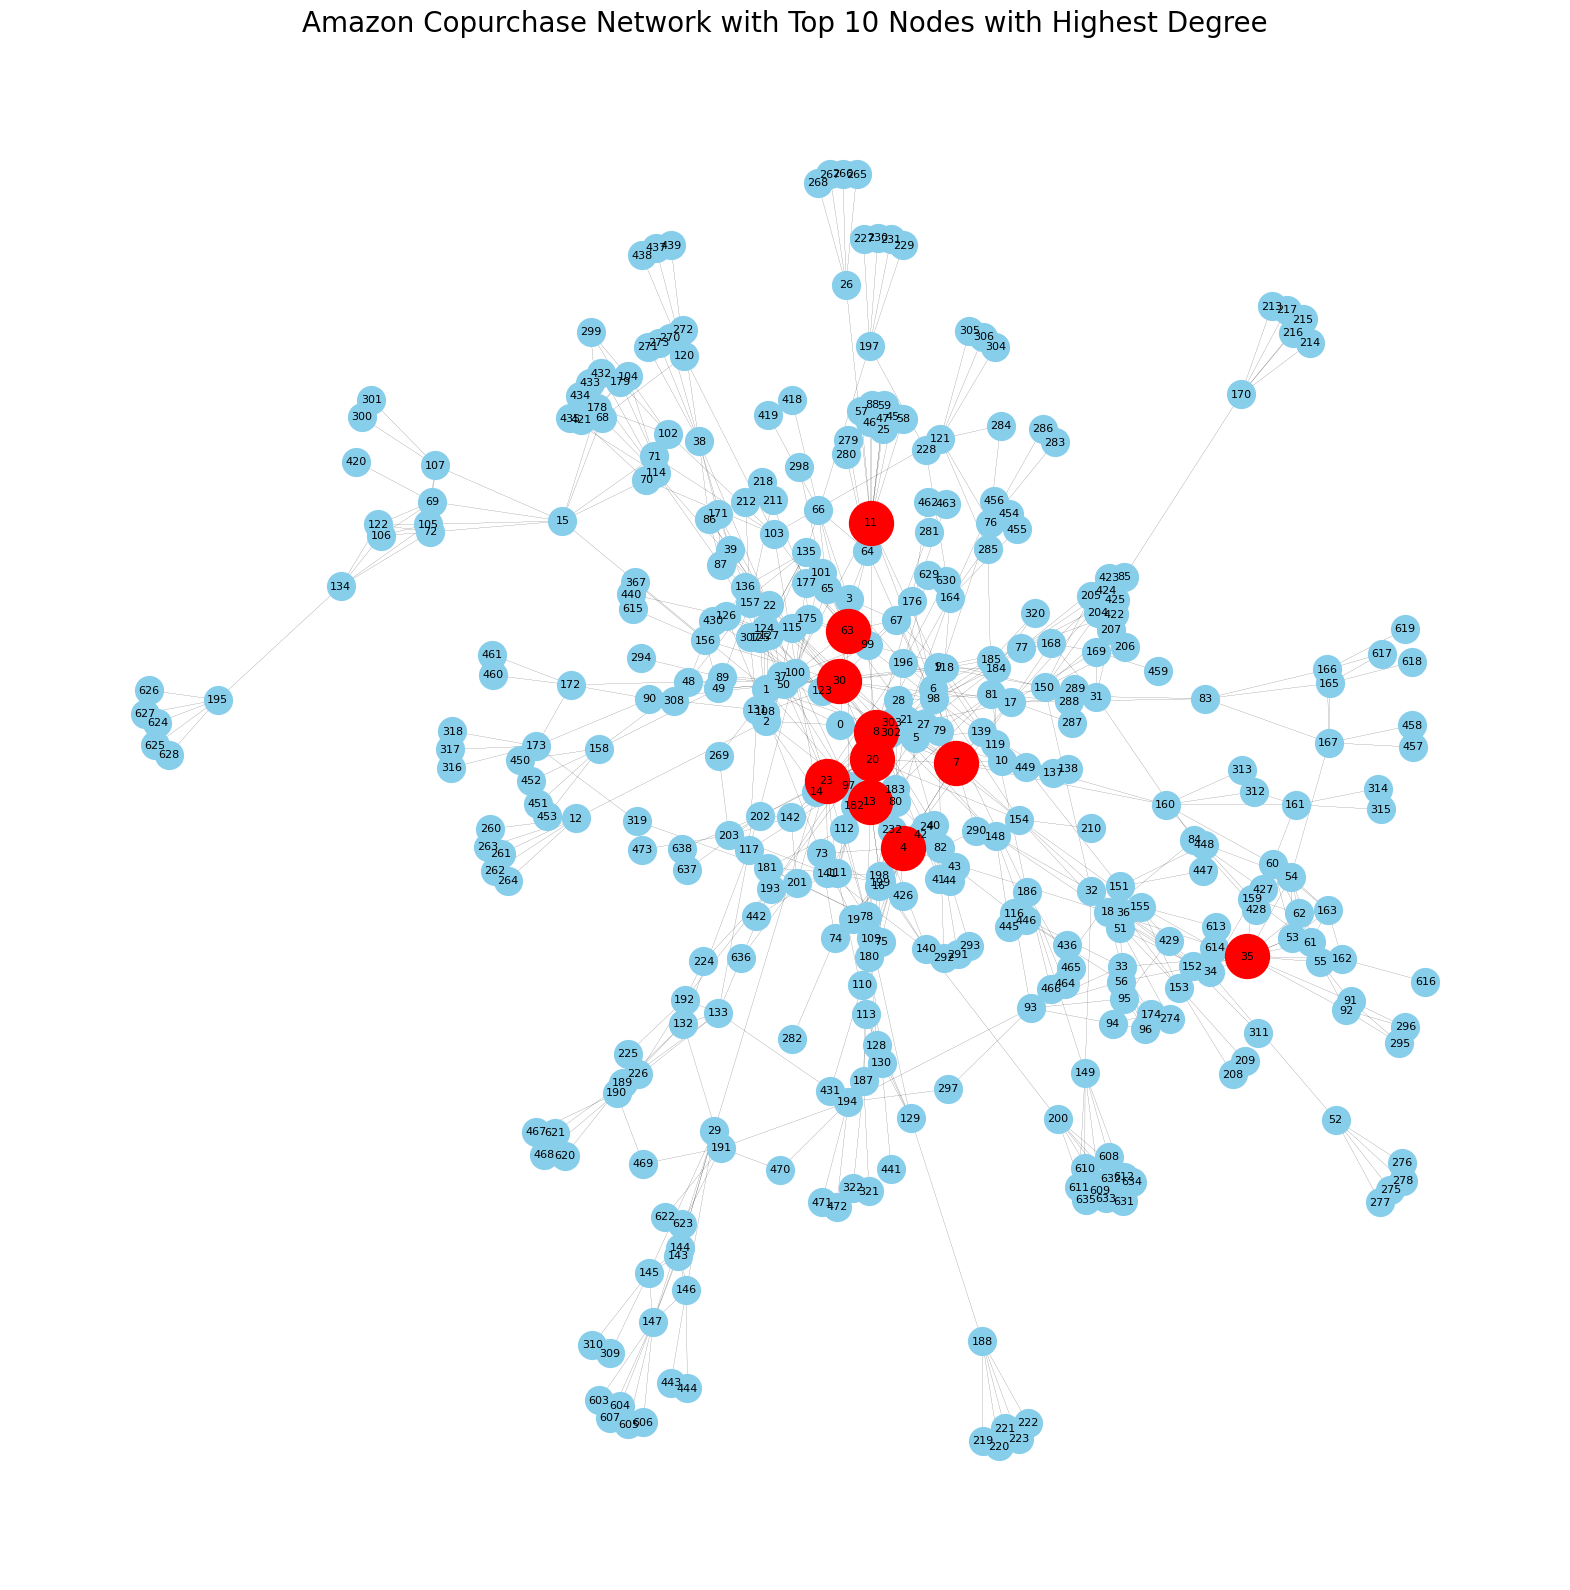

In [ ]:
# Visualize the top 10 nodes with the highest degree and highlight the nodes with  highest degree with a different color

G = nx.from_pandas_edgelist(df3[:1000], 'source', 'target', create_using=nx.Graph)

top_10_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]

# Visualize the graph
plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the nodes with the highest degree
for node, degree in top_10_nodes:
  nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=1000, node_color="red")

# Show the graph
plt.title("Amazon Copurchase Network with Top 10 Nodes with Highest Degree", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


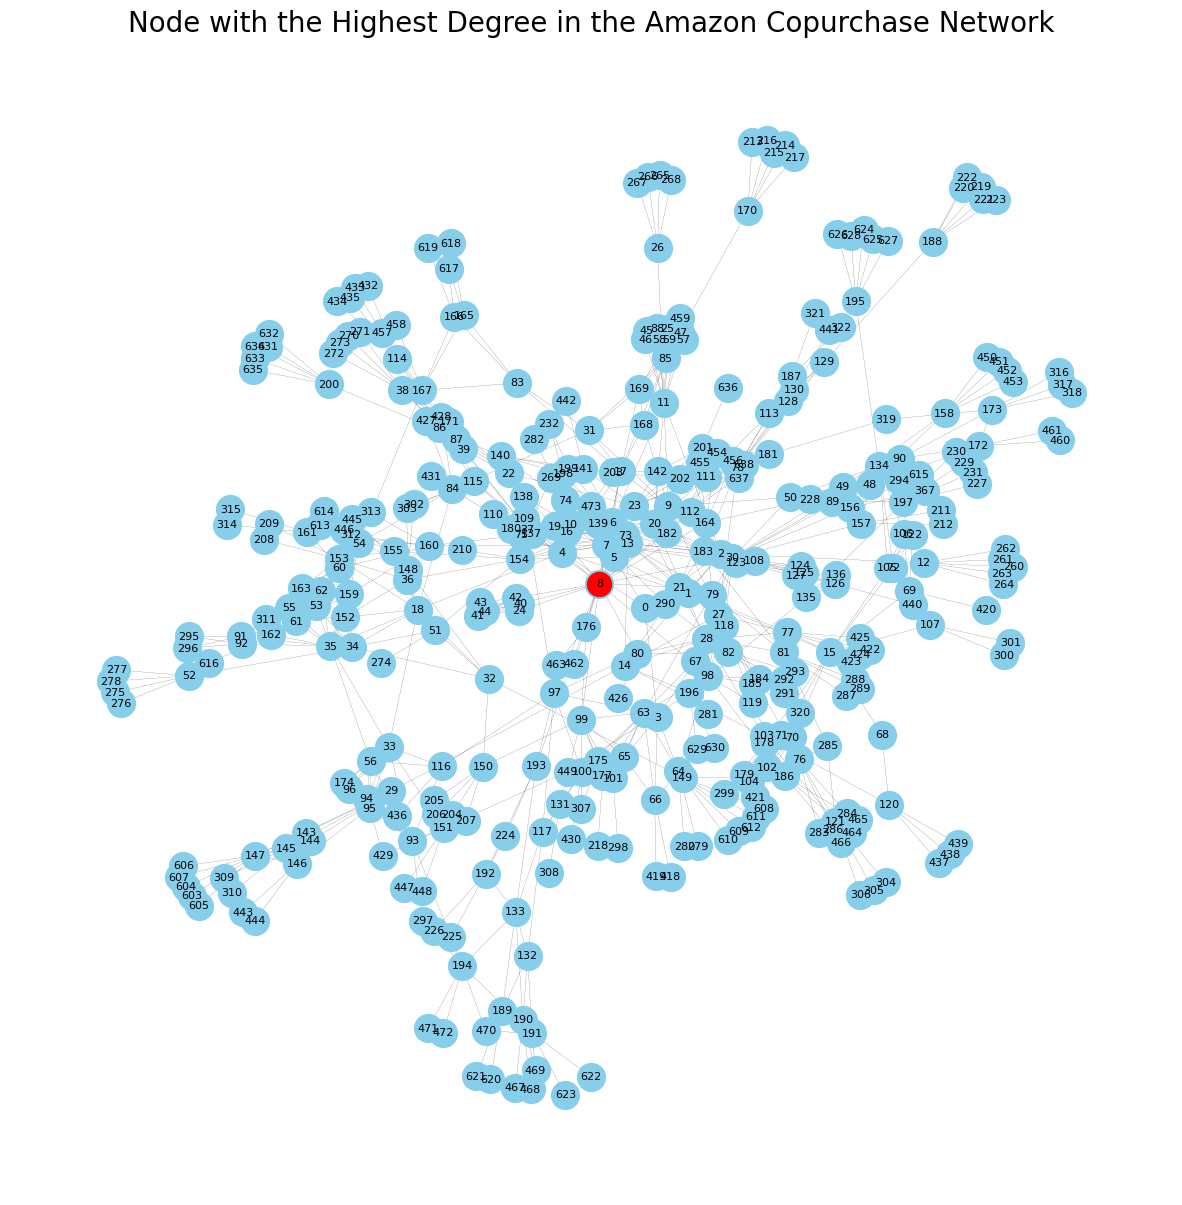

In [ ]:
# Visualize the top 10 nodes with the highest degree and highlight the highest degree node with a different color

G = nx.from_pandas_edgelist(df3[:1000], 'source', 'target', create_using=nx.Graph)

# Calculate the node with highest degree
max_degree = max(nx.degree(G), key=lambda x: x[1])

# Visualize the top 10 nodes with the highest degree
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the highest degree node with a different color
nx.draw_networkx_nodes(G, pos, nodelist=max_degree[0], node_color="red")


# Show the graph
plt.title("Node with the Highest Degree in the Amazon Copurchase Network", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# Calculate the node with highest degree

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Calculate the node with highest degree

max(nx.degree_centrality(G), key=nx.degree_centrality(G).get)
print("The node with the highest degree centrality is:", max(nx.degree_centrality(G), key=nx.degree_centrality(G).get))

The node with the highest degree centrality is: 8


## Connected components

Connected components in a network refer to subsets of nodes where each node within a subset is reachable from any other node by following edges in the graph. In simpler terms, it shows groups of nodes that are internally connected but not necessarily connected to nodes outside their group.

In [ ]:
# Calculate the node with the highest number of connected components

max_connected_components = max(nx.connected_components(G), key=len)
print("The nodes with the highest number of connected components is:", max_connected_components)


The nodes with the highest number of connected components is: {'1766', '1025', '929', '697', '1741', '1385', '867', '687', '1844', '320', '107', '907', '172', '703', '1019', '609', '644', '1561', '585', '1885', '25', '363', '1733', '995', '2574', '93', '552', '821', '484', '1390', '1815', '257', '175', '1285', '836', '1313', '1868', '1791', '1210', '810', '593', '1066', '698', '1147', '584', '988', '2582', '1379', '252', '1175', '909', '115', '913', '453', '2618', '294', '1245', '131', '1221', '60', '678', '937', '899', '1209', '1008', '1295', '1018', '180', '1146', '1271', '64', '128', '45', '1179', '38', '2651', '793', '1252', '1051', '1231', '1354', '1758', '1304', '291', '637', '537', '1739', '648', '1036', '439', '619', '851', '667', '1332', '415', '1278', '730', '1841', '967', '580', '749', '924', '1737', '815', '762', '1277', '304', '733', '935', '1038', '66', '353', '888', '1049', '1377', '1747', '1372', '1093', '212', '2603', '2646', '2644', '1045', '1307', '545', '677', '529'

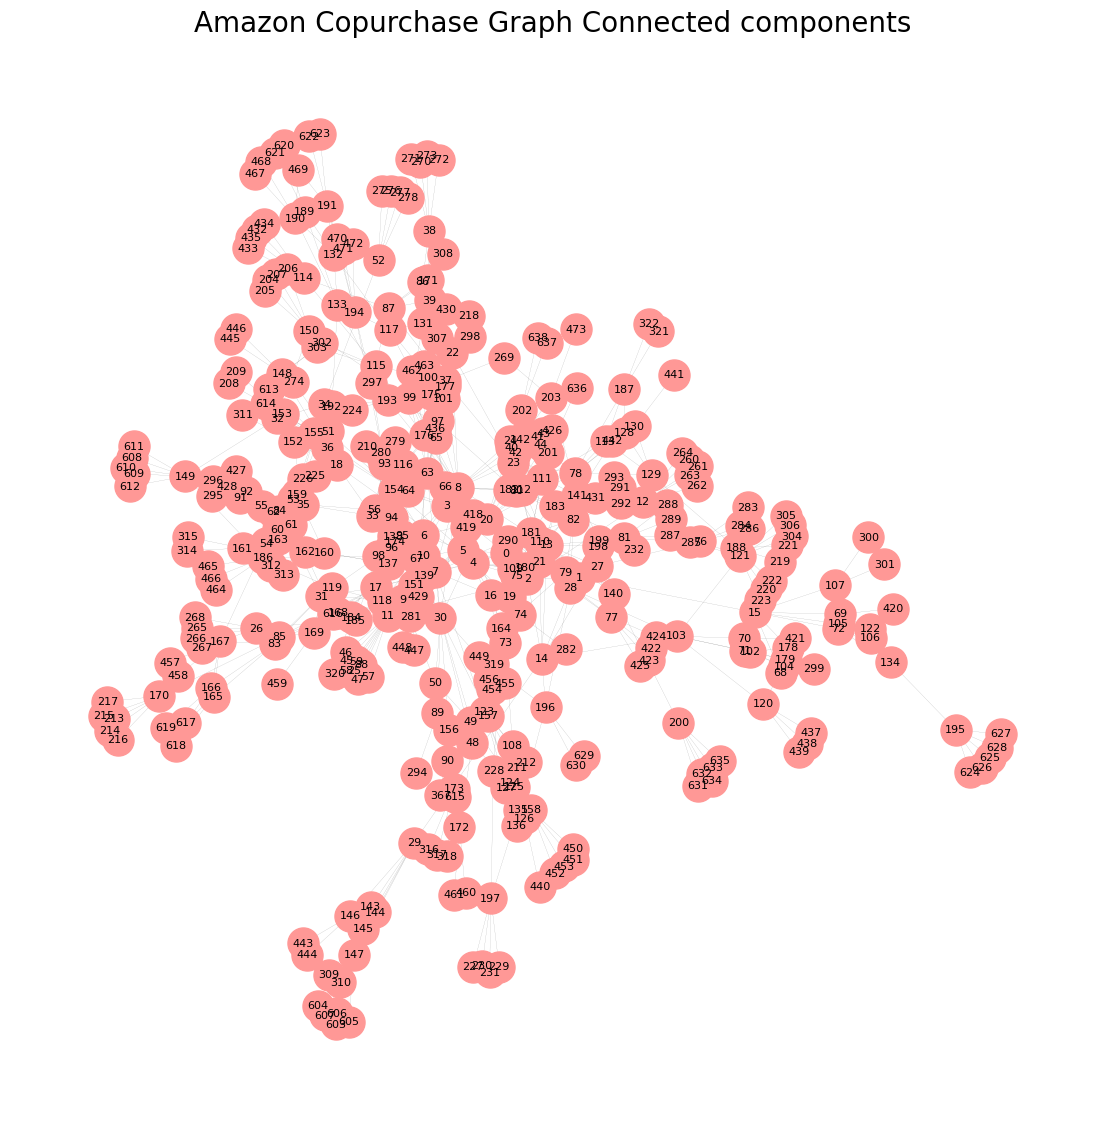

In [ ]:
# Visualize the connected components

G = nx.from_pandas_edgelist(df3[:1000], 'source', 'target', create_using=nx.Graph)

# Get a list of the connected components
components = nx.connected_components(G)

# Create a color list for each component
colors = []
for component in components:
    color = random.choice(plt.cm.get_cmap('tab20').colors)
    colors.append(color)

# Plot the graph with each component in a different color

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color=colors, font_size=8, font_color="black", edge_color="gray", width=0.1)

# Show the graph
plt.title("Amazon Copurchase Graph Connected components", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# calculate the number of strongly connected components

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.DiGraph)

# Get the strongly connected components
strongly_connected_components = nx.strongly_connected_components(G)

# Print the number of strongly connected components
print("The number of strongly connected components is:", len(list(strongly_connected_components)))


The number of strongly connected components is: 817


In [ ]:
# Calculate the number of the most weakly connected components

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.DiGraph)

# Get the weakly connected components
weakly_connected_components = nx.weakly_connected_components(G)

# Print the number of weakly connected components
print("The number of weakly connected components is:", len(list(weakly_connected_components)))


The number of weakly connected components is: 1


## Betweenness Centrality

Quantifies the number of shortest paths that pass through a node. Nodes with high betweenness centrality act as bridges between different parts of the network.

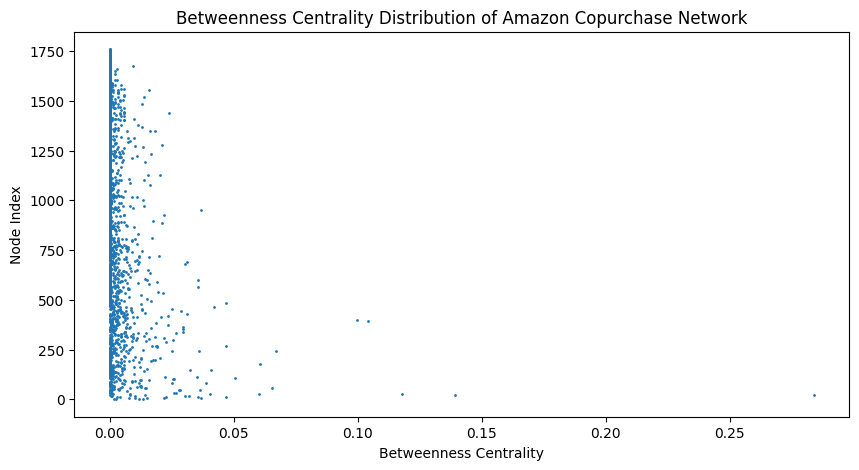

In [ ]:
# Visualize betweenness cenrality distribution as a scatter plot and evenly distribute the y-axis

import matplotlib.pyplot as plt
import networkx as nx

# Load the Amazon co-purchase network
G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Visualize betweenness centrality distribution as a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(list(betweenness_centrality.values()), list(range(len(betweenness_centrality))), s=1)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Node Index")
plt.title("Betweenness Centrality Distribution of Amazon Copurchase Network")
plt.show()


## Top 10 Nodes with the highest betweenness centrality

In [ ]:
# Calculate one node with highest betweeness centrality

# Load the Amazon co-purchase network
G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Find the node with the highest betweenness centrality
max_betweenness_centrality = max(betweenness_centrality.values())
node_with_max_betweenness_centrality = max(betweenness_centrality, key=betweenness_centrality.get)

# Print the node with the highest betweenness centrality
print("The node with the highest betweenness centrality is:", node_with_max_betweenness_centrality)


The node with the highest betweenness centrality is: 8


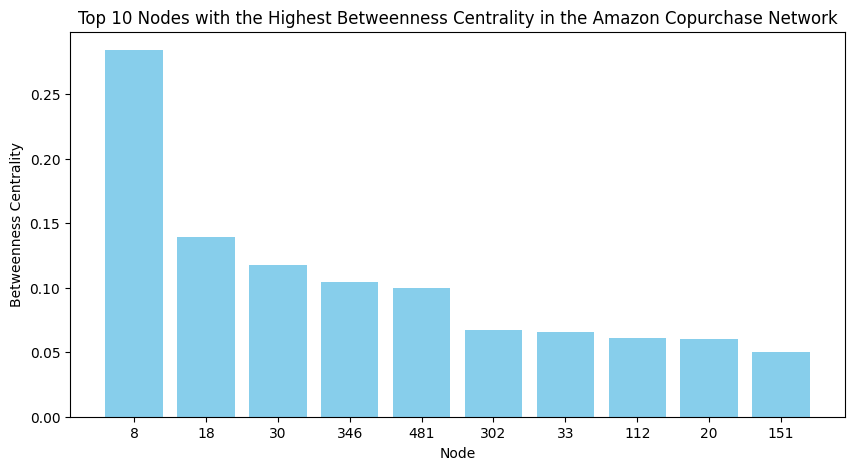

In [ ]:
# Calculate the top 10 nodes with highest betweenness centrality and plot a bar plot

# Load the Amazon co-purchase network
G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Sort the nodes by betweenness centrality in descending order
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 nodes with the highest betweenness centrality
top_10_nodes = sorted_nodes[:10]

# Create a bar plot of the top 10 nodes with the highest betweenness centrality
plt.figure(figsize=(10, 5))
plt.bar([node[0] for node in top_10_nodes], [node[1] for node in top_10_nodes], color="skyblue")
plt.xlabel("Node")
plt.ylabel("Betweenness Centrality")
plt.title("Top 10 Nodes with the Highest Betweenness Centrality in the Amazon Copurchase Network")
plt.show()


Nodes with Highest betweenness centrality are ['8', '18', '30', '346', '481', '302', '33', '112', '20', '151', '345', '13', '193', '342', '99', '21', '78', '976', '11', '28', '133', '374', '512', '14', '97', '98', '17', '238', '719', '717', '7', '226', '223', '317', '479', '27', '29', '216', '22', '23', '93', '150', '449', '248', '303', '80', '964', '227', '330', '445', '63', '154', '788', '4', '367', '355', '913', '819', '476', '861', '117', '407', '368', '197', '372', '190', '196', '632', '930', '450', '115', '114', '1035', '194', '561', '498', '470', '170', '889', '929', '839', '527', '404', '210', '1015', '370', '149', '862', '704', '350', '15', '100', '375', '35', '204', '217', '376', '32', '6', '874', '243', '851', '160', '228', '999', '908', '906', '186', '2', '808', '480', '482', '938', '416', '983', '258', '164', '116', '173', '111', '148', '867', '84', '38', '421', '76', '411', '541', '1', '401', '167', '939', '768', '514', '215', '398', '810', '212', '934', '325', '37', '386

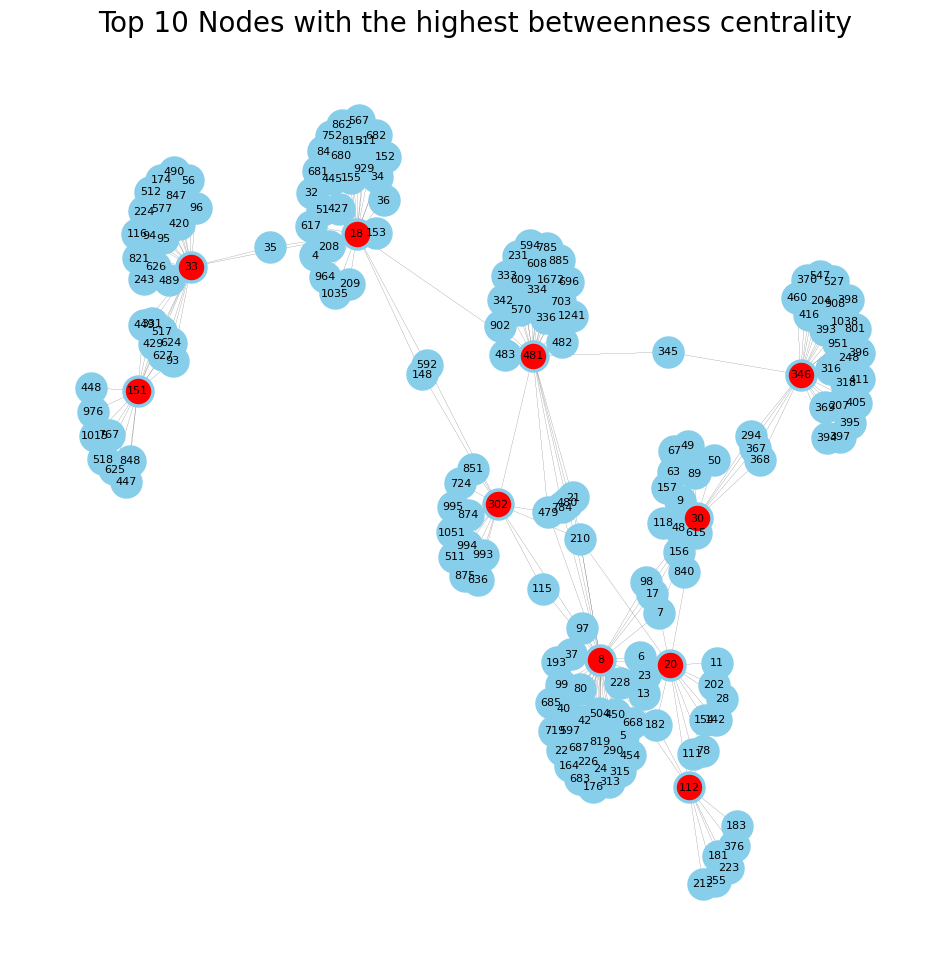

In [ ]:
# Visualize the nodes which are nearest to each other with highest between ness centrality


# Load the Amazon co-purchase network
G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Get the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(G)

# Sort the nodes by their betweenness centrality
sorted_nodes = sorted(betweenness_centrality, key=lambda x: betweenness_centrality[x], reverse=True)
print("Nodes with Highest betweenness centrality are", sorted_nodes)

# Visualize the nodes with the highest betweenness centrality

# Create an empty graph
G_top_10 = nx.Graph()

# Add the top 10 nodes and their edges to the graph
for node in sorted_nodes[:10]:
    G_top_10.add_node(node)
    for neighbor in G[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the graph
plt.figure(figsize=(12, 12))

# Create a layout for the nodes
pos = nx.spring_layout(G_top_10)  # Layout algorithm for node positions
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the top 10 nodes with a different color
nx.draw_networkx_nodes(G_top_10, pos, nodelist=sorted_nodes[:10], node_color='red')

# Show the graph
plt.title("Top 10 Nodes with the highest betweenness centrality", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


## Top 10 Nodes with the lowest betweenness centrality

In [ ]:
# Calculate one node with the lowest betweenness centrality

# Load the Amazon co-purchase network
G = nx.from_pandas_edgelist(df3[:1000], 'source', 'target', create_using=nx.Graph)

# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Find the node with the lowest betweenness centrality
min_betweenness_centrality = min(betweenness_centrality.values())
node_with_min_betweenness_centrality = min(betweenness_centrality, key=betweenness_centrality.get)

# Print the node with the lowest betweenness centrality
print("The node with the lowest betweenness centrality is:", node_with_min_betweenness_centrality)


The node with the lowest betweenness centrality is: 138


The most distant nodes in the network are ['138', '260', '261', '262', '263', '264', '41', '43', '44', '46']


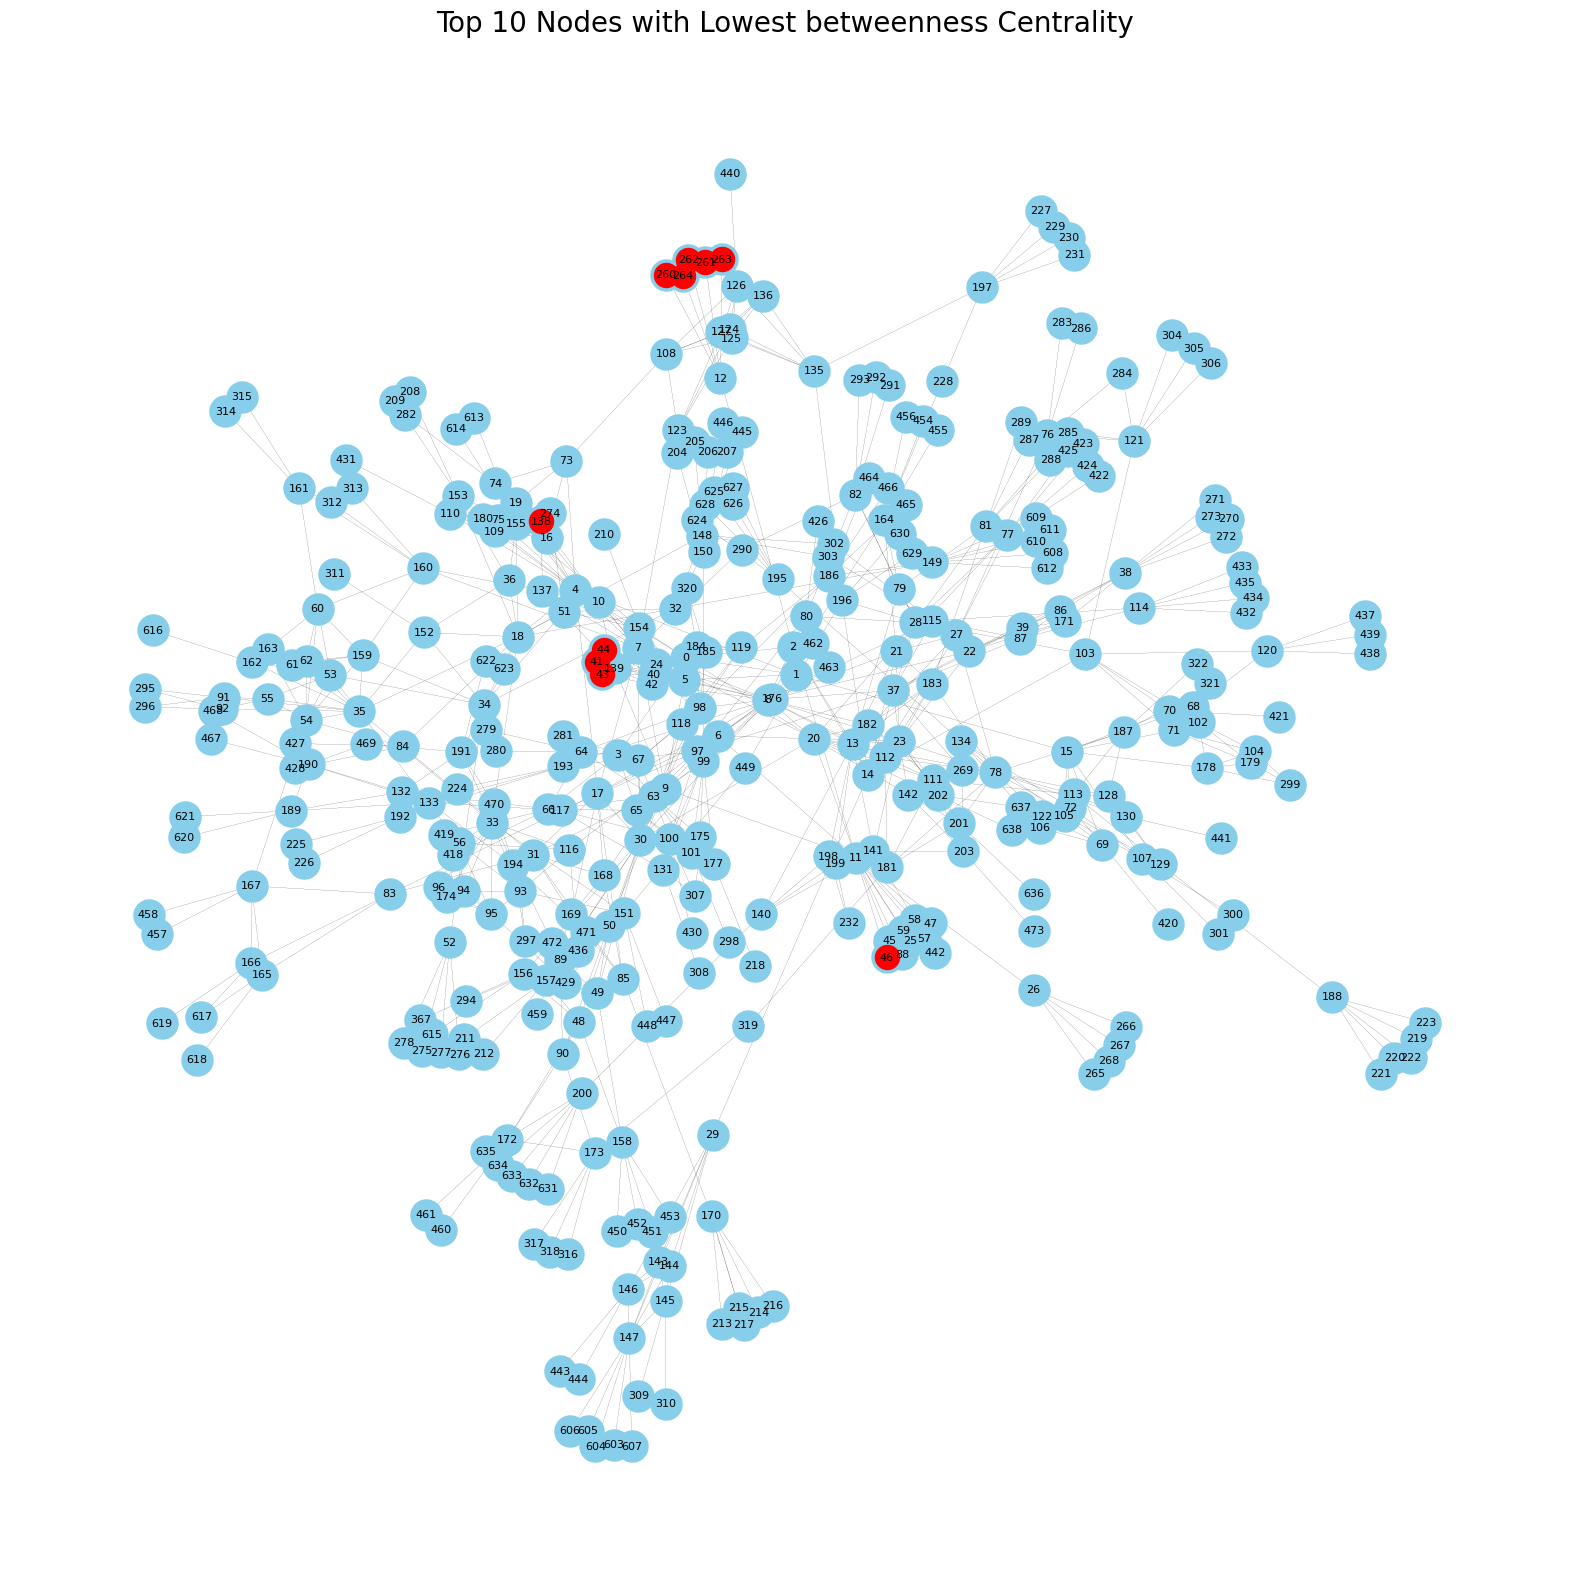

In [ ]:
# Plot the most distant nodes

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df3[:1000], source='source', target='target')

# Compute betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Find the two nodes with the highest betweenness centrality
most_distant_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=False)[:10]
print("The most distant nodes in the network are", most_distant_nodes)

# Visualize the most distant nodes
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G)  # Layout algorithm for node positions
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)
nx.draw_networkx_nodes(G, pos, nodelist=most_distant_nodes, node_color='red')
plt.title("Top 10 Nodes with Lowest betweenness Centrality", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


## Closeness Centrality

Closeness centrality is a measure in network analysis that quantifies how close or central a node is to all other nodes in a network. It's based on the average shortest path distance from a node to all other nodes in the network.

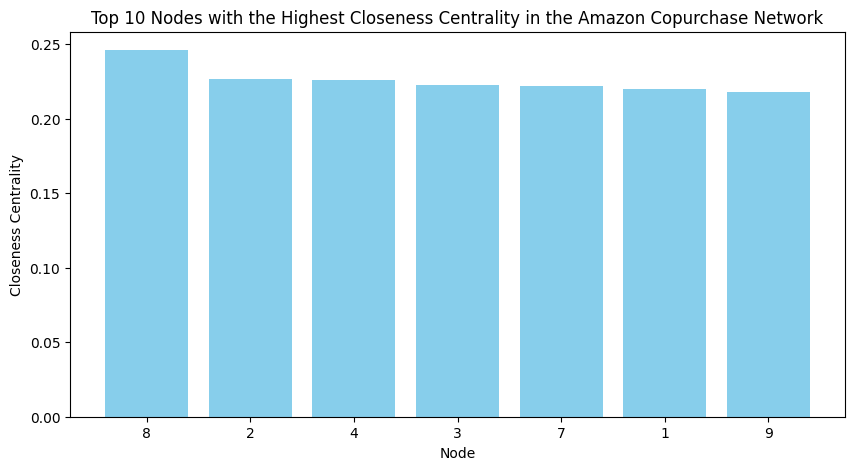

In [ ]:
# prompt: calculate the nodes with the highest closeness centrality and plot the top 10 nodes in a bar plot

# Load the Amazon co-purchase network
G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Calculate closeness centrality for each node
closeness_centrality = nx.closeness_centrality(G)

# Sort the nodes by their closeness centrality
sorted_nodes = sorted(closeness_centrality, key=lambda x: closeness_centrality[x], reverse=True)

# Get the top 10 nodes with the highest closeness centrality
top_10_nodes = sorted_nodes[:10]

# Create a bar plot of the top 10 nodes with the highest closeness centrality
plt.figure(figsize=(10, 5))
plt.bar([node[0] for node in top_10_nodes], [closeness_centrality[node] for node in top_10_nodes], color="skyblue")
plt.xlabel("Node")
plt.ylabel("Closeness Centrality")
plt.title("Top 10 Nodes with the Highest Closeness Centrality in the Amazon Copurchase Network")
plt.show()


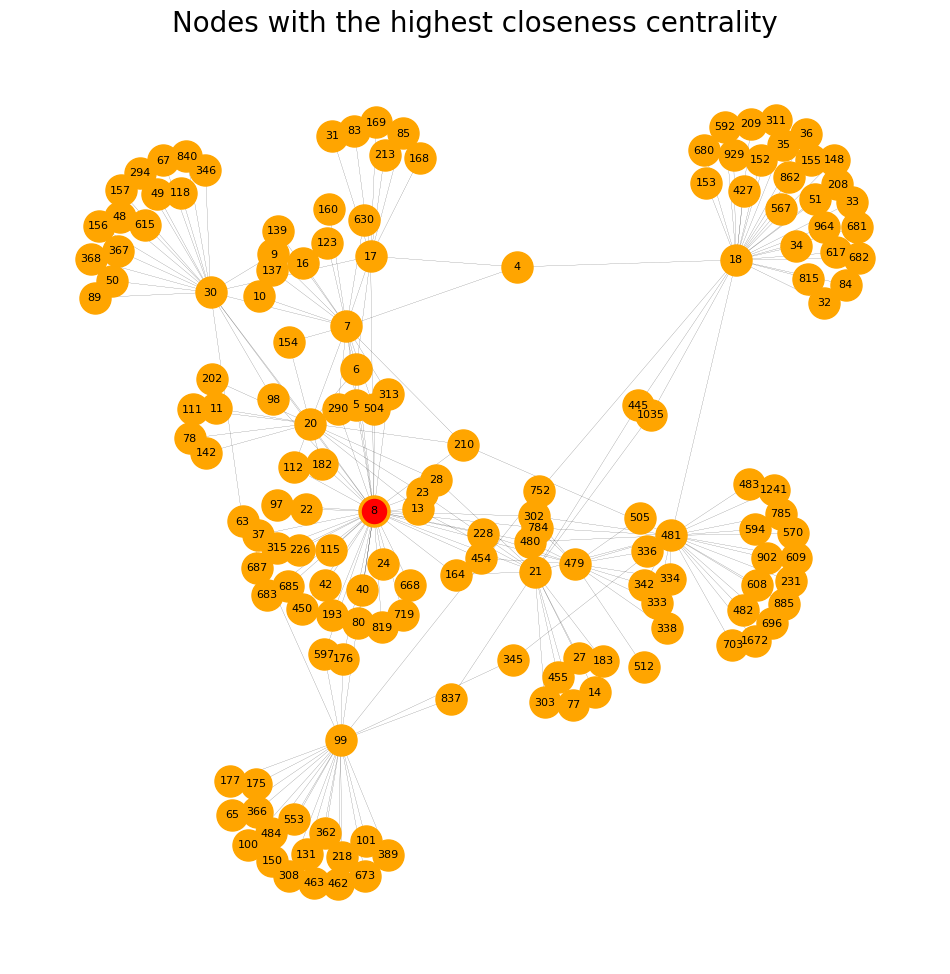

In [ ]:
# Visualize the nodes with the highest closeness centrality and Highlight the node with the highest closeness centrality in the visualization

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)

# Sort the nodes by closeness centrality
sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Create an empty graph
G_top_10 = nx.Graph()

# Add the top 10 nodes and their edges to the graph
for node in sorted_nodes[:10]:
    G_top_10.add_node(node)
    for neighbor in G[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the graph
plt.figure(figsize=(12, 12))

# Create a layout for the nodes
pos = nx.spring_layout(G_top_10)  # Layout algorithm for node positions
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="orange", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the node with the highest closeness centrality
node_with_highest_closeness_centrality = sorted_nodes[0]
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[node_with_highest_closeness_centrality], node_color='red')

# Show the graph
plt.title("Nodes with the highest closeness centrality", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# Calculate the node with highest closeness centrality

G = nx.from_pandas_edgelist(df3, source='source', target='target')

# Calculate closeness centrality for all nodes
closeness_centrality = nx.closeness_centrality(G)

# Get the node with the highest closeness centrality
node_with_highest_closeness_centrality = max(closeness_centrality, key=closeness_centrality.get)

# Print the node with the highest closeness centrality
print("The node with the highest closeness centrality is", node_with_highest_closeness_centrality)


The node with the highest closeness centrality is 8


## Use the Girvan-Newman algorithm for community detection and plot the communities.

In [ ]:
import numpy as np
import networkx as nx
from networkx.algorithms import community #use community algorithm to detect communities within a graph
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df3[:1000], source='source', target='target')

# print communities within the graph
get_communities = True
if get_communities == True:
    find_communities = community.girvan_newman(G)
    top_level_communities = next(find_communities)
    next_level_communities = next(find_communities)
    communities = sorted(map(sorted, next_level_communities))
    print(communities)

[['0', '1', '10', '100', '101', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '135', '136', '137', '138', '139', '14', '140', '141', '142', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '23', '230', '231', '232', '24', '25', '26', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '27', '270',

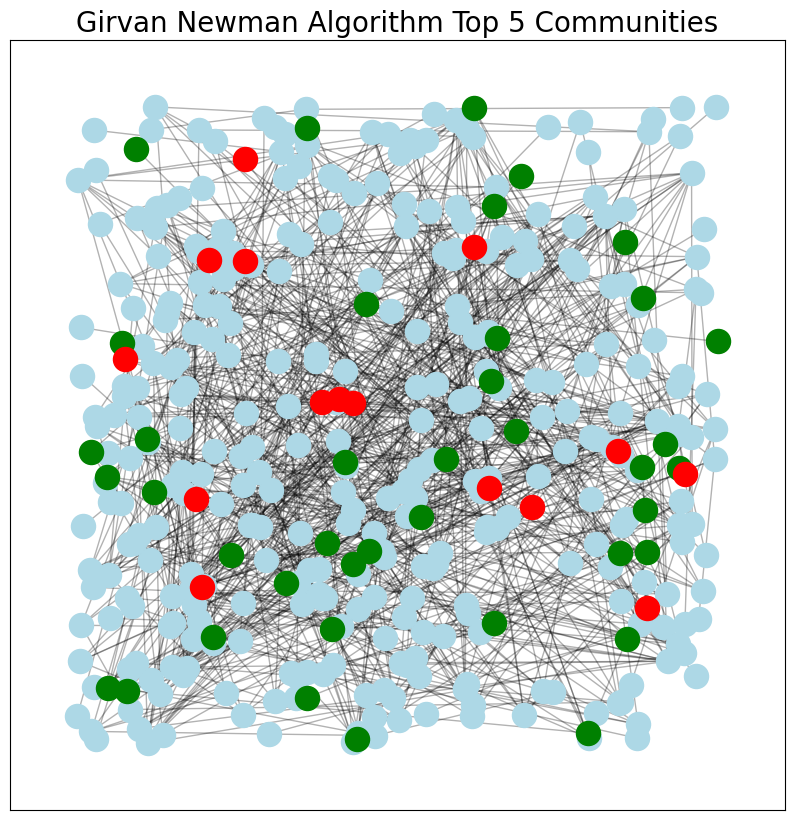

In [ ]:

# Plot the top 5 communities


# Create a layout for the nodes
pos = nx.random_layout(G, seed=23)

colors = ['lightblue', 'green', 'red', 'yellow', 'orange', 'purple', 'black', 'brown', 'pink']


plt.figure(figsize=(10,10))

plt.title("Girvan Newman Algorithm Top 5 Communities", fontsize = 20 )

for i, community in enumerate(communities[:5]):

  nx.draw_networkx_nodes(G, pos, community, node_color=colors[i])

nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.show()

## Calculate the Modularity Score for the Girvan Newman Communities

In [ ]:
# Calculate the Modularity Score for the Girvan Newman Communities

from networkx.algorithms import community #use community algorithm to detect communities within a graph
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# create a graph from the dataframe
G = nx.from_pandas_edgelist(df3[:1000], source='source', target='target')

# get communities within the graph
get_communities = True
if get_communities == True:
    find_communities = community.girvan_newman(G)
    top_level_communities = next(find_communities)
    next_level_communities = next(find_communities)
    communities = sorted(map(sorted, next_level_communities))

# calculate the modularity score
modularity = community.modularity(G, communities)

# print the modularity score
print("The modularity scoreGirvan Newman communities is", modularity)


The modularity scoreGirvan Newman communities is 0.20985850572218268


## Use the Louvain algorithm for community detection and plot the communities.

[['0', '1', '109', '110', '12', '16', '180', '19', '2', '260', '261', '262', '263', '264', '282', '4', '431', '73', '74', '75'], ['10', '137', '138', '139', '165', '166', '167', '168', '169', '17', '170', '176', '213', '214', '215', '216', '217', '31', '457', '458', '459', '462', '463', '5', '6', '617', '618', '619', '7', '83', '85', '9'], ['100', '101', '118', '119', '131', '175', '177', '184', '185', '186', '218', '279', '280', '281', '298', '3', '307', '308', '320', '418', '419', '430', '464', '465', '466', '63', '64', '65', '66', '67', '98', '99'], ['102', '103', '104', '105', '106', '107', '120', '122', '134', '15', '178', '179', '195', '299', '300', '301', '420', '421', '437', '438', '439', '624', '625', '626', '627', '628', '68', '69', '70', '71', '72'], ['108', '123', '124', '125', '126', '127', '135', '136', '196', '197', '227', '229', '230', '231', '440', '449', '629', '630'], ['11', '25', '26', '265', '266', '267', '268', '45', '46', '47', '57', '58', '59', '88'], ['111', '1

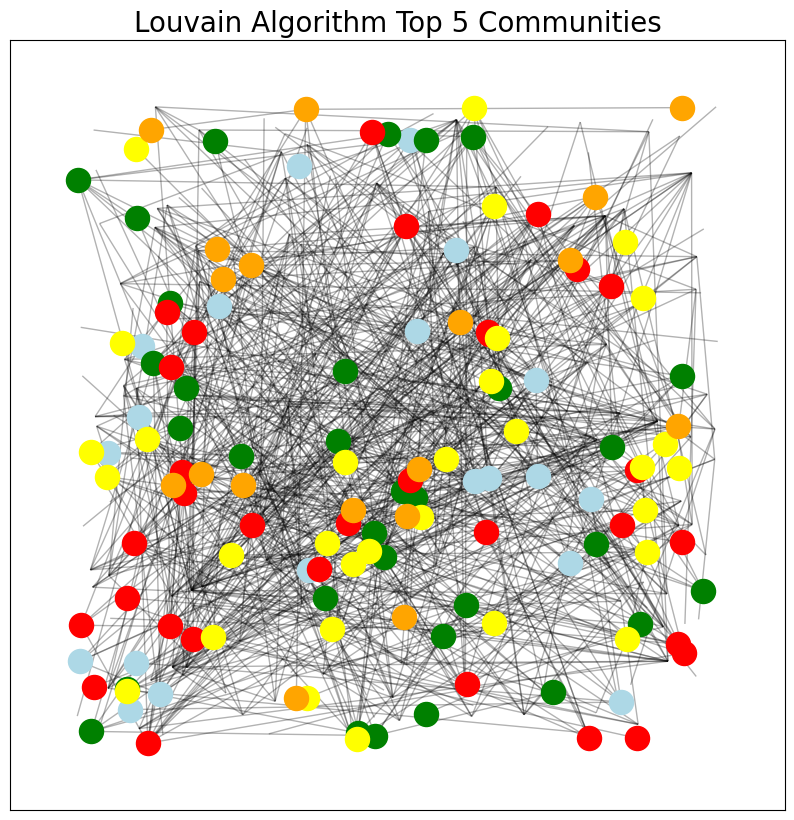

In [ ]:
# Use louvain method for community detection and plot the communities with different colors

import numpy as np
import networkx as nx
from networkx.algorithms import community #use community algorithm to detect communities within a graph
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df3[:1000], source='source', target='target')

# print communities within the graph
get_communities = True
if get_communities == True:
    find_communities = community.louvain_communities(G)
    communities = sorted(map(sorted, find_communities))
    print(communities)

# Plot the top 5 communities


# Create a layout for the nodes
pos = nx.random_layout(G, seed=23)

colors = ['lightblue', 'green', 'red', 'yellow', 'orange', 'purple', 'black', 'brown', 'pink']


plt.figure(figsize=(10,10))

plt.title("Louvain Algorithm Top 5 Communities", fontsize = 20 )

for i, community in enumerate(communities[:5]):

  nx.draw_networkx_nodes(G, pos, community, node_color=colors[i])

nx.draw_networkx_edges(G, pos, alpha=0.3)

plt.show()


## Compute the Modularity Score for the Louvain Communities

In [ ]:
# Compute the Modularity Score for the Louvain Communities

from networkx.algorithms import community #use community algorithm to detect communities within a graph
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# create a graph from the dataframe
G = nx.from_pandas_edgelist(df3[:1000], source='source', target='target')

# get communities within the graph
get_communities = True
if get_communities == True:
    find_communities = community.louvain_communities(G)
    communities = sorted(map(sorted, find_communities))

# calculate the modularity score
modularity = community.modularity(G, communities)

# print the modularity score
print("The modularity score of the Louvain Communities is", modularity)


The modularity score of the Louvain Communities is 0.7969436832250805


## Degree Centrality

Measures the number of connections (edges) each node has. Nodes with high degree centrality are more connected and considered more central in the network.

In [ ]:
# Calculate the node with highest degree centrality

# Load the Amazon co-purchase network
G = nx.from_pandas_edgelist(df3, source='source', target='target')

# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Get the node with the highest degree centrality
node_with_highest_degree_centrality = max(degree_centrality, key=degree_centrality.get)

# Print the node with the highest degree centrality
print("The node with the highest degree centrality is", node_with_highest_degree_centrality)


The node with the highest degree centrality is 8


In [ ]:
# Calculate the degree centrality for G

# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df3, source='source', target='target')

degree_centrality = nx.degree_centrality(G)

# Convert the results into in a dataframe

degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['node', 'degree_centrality'])
degree_centrality_df.sort_values(by='degree_centrality', ascending=False, inplace=True)
dcf = degree_centrality_df.head(10)
dcf

node  degree_centrality
22     8           0.025000
19    18           0.017045
391  346           0.015909
81    78           0.014773
398  481           0.014773
56    33           0.014773
11    63           0.014205
148   99           0.013636
26    30           0.011932
7     11           0.011932

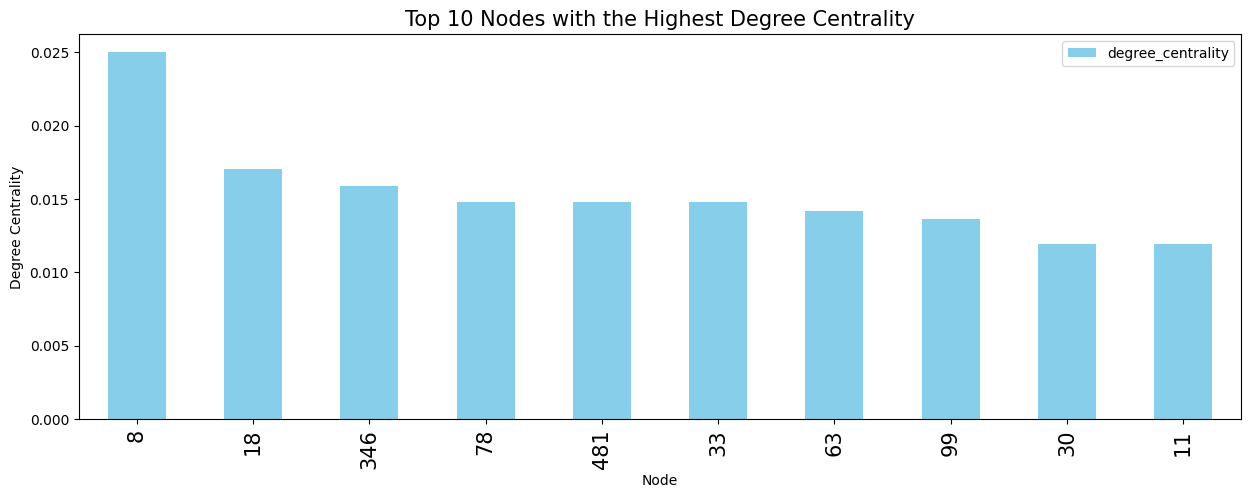

In [ ]:
# Plot degree centrality for top 10 nodes

dcf.plot(x='node', y='degree_centrality', kind='bar', color ="skyblue", figsize=(15, 5))
plt.title('Top 10 Nodes with the Highest Degree Centrality', size = 15)
plt.xlabel('Node')
plt.ylabel('Degree Centrality')
plt.xticks(size =15)
plt.yticks(size =10)
plt.show()


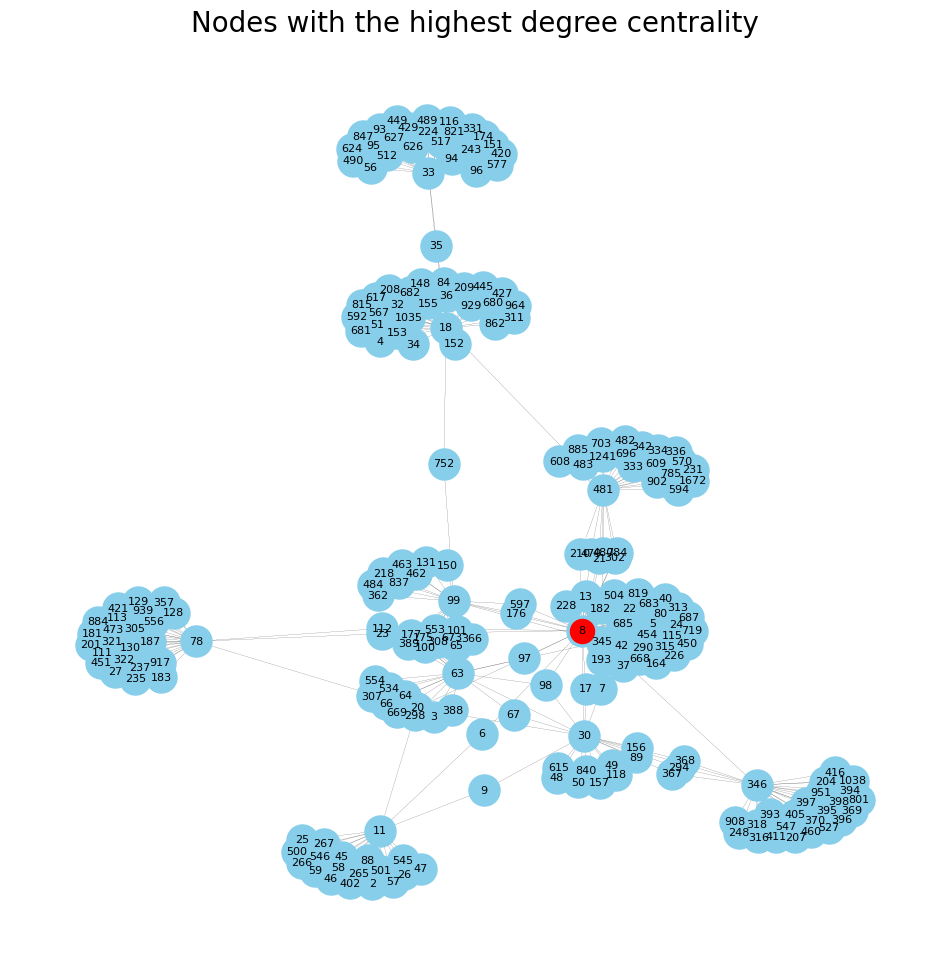

In [ ]:
 # Visualize the nodes with the highest degree centrality and Highlight the node with the highest degree centrality in the visualization

G = nx.from_pandas_edgelist(df3, 'source', 'target', create_using=nx.Graph)

# Calculate degree centrality for all nodes
degree_centrality = nx.degree_centrality(G)

# Sort the nodes by degree centrality
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Create an empty graph
G_top_10 = nx.Graph()

# Add the top 10 nodes and their edges to the graph
for node in sorted_nodes[:10]:
    G_top_10.add_node(node)
    for neighbor in G[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the graph
plt.figure(figsize=(12, 12))

# Create a layout for the nodes
pos = nx.spring_layout(G_top_10)  # Layout algorithm for node positions
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the node with the highest degree centrality
node_with_highest_degree_centrality = sorted_nodes[0]
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[node_with_highest_degree_centrality], node_color='red')

# Show the graph
plt.title("Nodes with the highest degree centrality", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()



## Eigenvector Centrality:
Eigenvector centrality assigns scores to nodes based not only on their connections but also on the connections of their neighbors. Nodes connected to high-scoring nodes receive higher scores themselves. It highlights influential nodes that are connected to other influential nodes, emphasizing importance within the network structure. Eigenvector centrality is akin to a recursive measure, where a node's score depends on the scores of its neighbors.

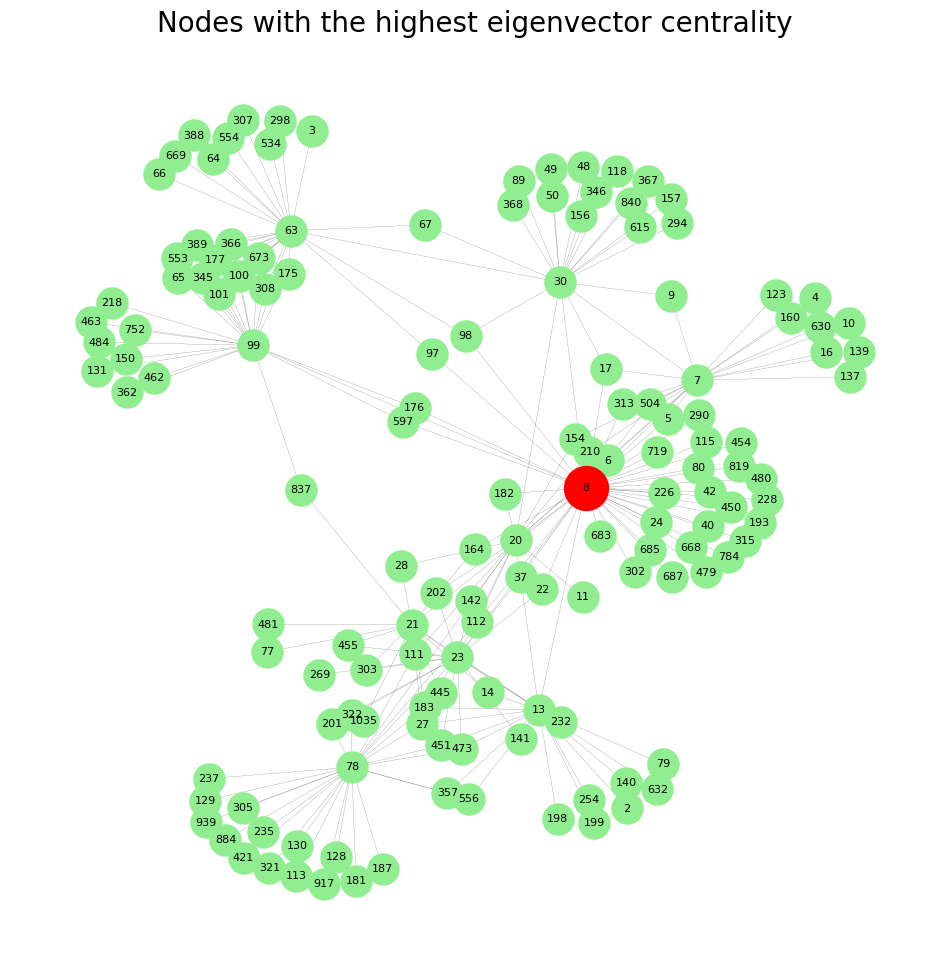

The node with the highest eigenvector centrality is 8
The node with the highest eigenvector similarity is 8


In [ ]:
# Visualize the nodes with the highest eigen vector centrality and highlight the node with highest eigenvector similarity with a different color

# Create a graph from the dataframe

G = nx.from_pandas_edgelist(df3, source='source', target='target')

# Compute eigenvector centrality for all nodes
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort the nodes by their eigenvector centrality
sorted_nodes = sorted(eigenvector_centrality, key=lambda x: eigenvector_centrality[x], reverse=True)

# Visualize the nodes with the highest eigenvector centrality

# Create an empty graph
G_top_10 = nx.Graph()

# Add the top 10 nodes and their edges to the graph
for node in sorted_nodes[:10]:
    G_top_10.add_node(node)
    for neighbor in G[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the graph
plt.figure(figsize=(12, 12))

# Create a layout for the nodes
pos = nx.spring_layout(G_top_10)  # Layout algorithm for node positions
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="lightgreen", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the node with highest eigenvector similarity
max_sim = 0
max_sim_node = None
for node in sorted_nodes:
    sim = eigenvector_centrality[node]
    if sim > max_sim:
        max_sim = sim
        max_sim_node = node
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[max_sim_node], node_color="red", node_size=1000)

# Show the graph
plt.title("Nodes with the highest eigenvector centrality", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()

# Show the node with highest eigenvector centrality

eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_nodes = sorted(eigenvector_centrality, key=lambda x: eigenvector_centrality[x], reverse=True)
print('The node with the highest eigenvector centrality is', sorted_nodes[0])
print('The node with the highest eigenvector similarity is', max_sim_node)


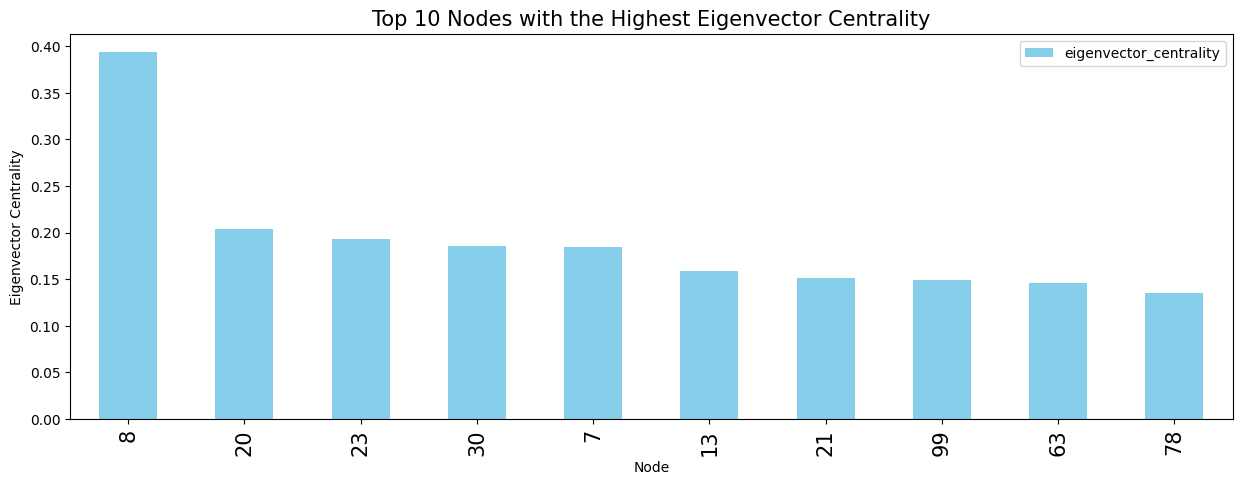

In [ ]:
# Plot eigenvector centrality for top 10 nodes

eigenvector_centrality_df = pd.DataFrame(list(eigenvector_centrality.items()), columns=['node', 'eigenvector_centrality'])
eigenvector_centrality_df.sort_values(by='eigenvector_centrality', ascending=False, inplace=True)
ecf = eigenvector_centrality_df.head(10)
ecf
ecf.plot(x='node', y='eigenvector_centrality', kind='bar', color ="skyblue", figsize=(15, 5))
plt.title('Top 10 Nodes with the Highest Eigenvector Centrality', size = 15)
plt.xlabel('Node')
plt.ylabel('Eigenvector Centrality')
plt.xticks(size =15)
plt.yticks(size =10)
plt.show()


## PageRank:

PageRank measures the importance of nodes based on the importance of nodes pointing to them. PageRank identifies nodes that are crucial within a network by considering not just their direct connections but also the connections of their neighbors.It considers both the quantity and quality of links.

The node with the highest PageRank is 8


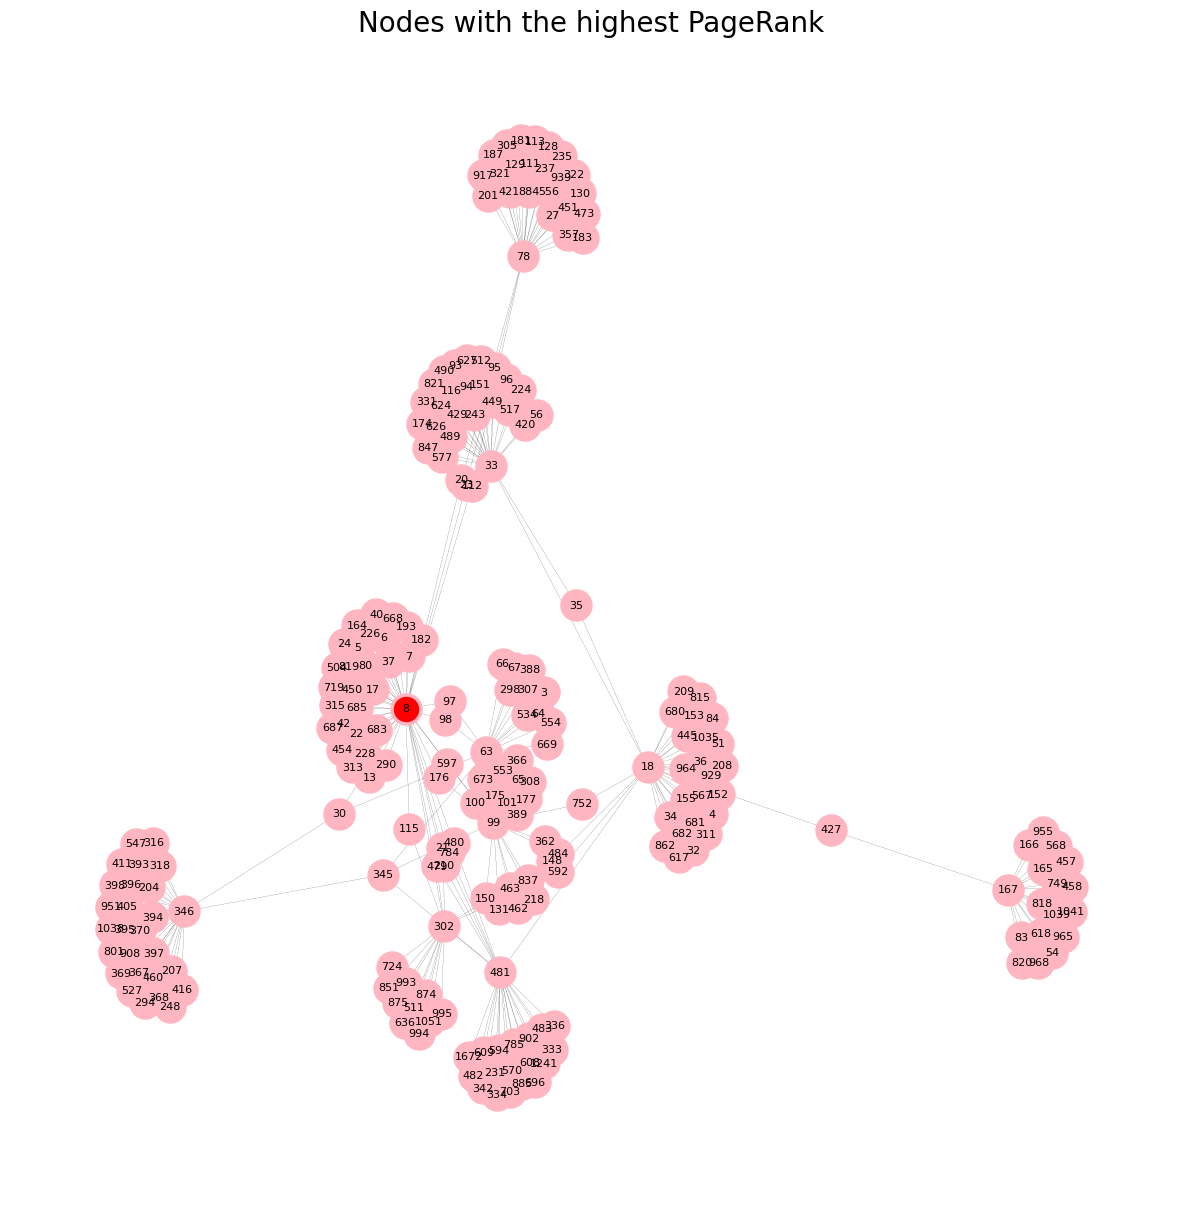

In [ ]:
G = nx.from_pandas_edgelist(df3, source='source', target='target')

# Compute PageRank for all nodes
page_rank = nx.pagerank(G)
sorted_nodes = sorted(page_rank, key=lambda x: page_rank[x], reverse=True)
print('The node with the highest PageRank is', sorted_nodes[0])

# Visualize the nodes with the highest PageRank

# Create an empty graph
G_top_10 = nx.Graph()

# Add the top 10 nodes and their edges to the graph
for node in sorted_nodes[:10]:
    G_top_10.add_node(node)
    for neighbor in G[node]:
        G_top_10.add_edge(node, neighbor)

# Visualize the graph
plt.figure(figsize=(15, 15))

# Create a layout for the nodes
pos = nx.spring_layout(G_top_10)  # Layout algorithm for node positions
nx.draw_networkx(G_top_10, pos, with_labels=True, node_size=500, node_color="lightpink", font_size=8, font_color="black", edge_color="black", width=0.1)

# Highlight the node with the highest PageRank
nx.draw_networkx_nodes(G_top_10, pos, nodelist=[sorted_nodes[0]], node_color="red")

# Show the graph
plt.title("Nodes with the highest PageRank", fontsize=20)
plt.axis('off')  # Turn off axis labels
plt.show()


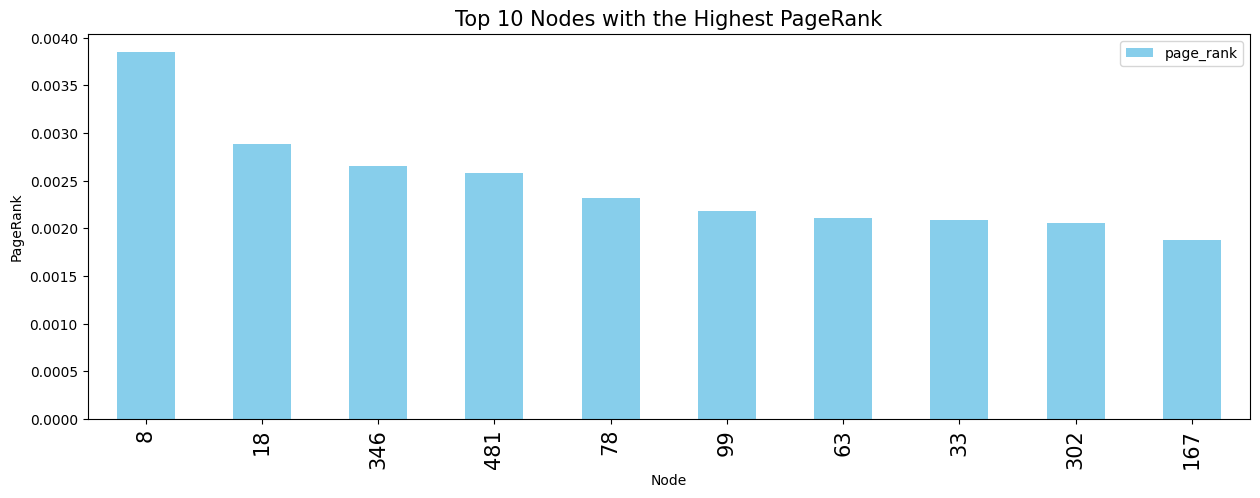

In [ ]:
# Plot the top 10 nodes with highest page rank

page_rank_df = pd.DataFrame(list(page_rank.items()), columns=['node', 'page_rank'])
page_rank_df.sort_values(by='page_rank', ascending=False, inplace=True)
prdf = page_rank_df.head(10)
prdf.plot(x='node', y='page_rank', kind='bar', color ="skyblue", figsize=(15, 5))
plt.title('Top 10 Nodes with the Highest PageRank', size = 15)
plt.xlabel('Node')
plt.ylabel('PageRank')
plt.xticks(size =15)
plt.yticks(size =10)
plt.show()
